<a href="https://colab.research.google.com/github/ShriMLEngineer/yolov3_customTrain/blob/main/YoloV3TrainInference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone github repo

In [11]:
!git clone https://github.com/ShriMLEngineer/yolov3_customTrain.git 

Cloning into 'yolov3_customTrain'...
remote: Enumerating objects: 567, done.
remote: Counting objects: 100% (300/300), done.
remote: Compressing objects: 100% (236/236), done.
remote: Total 567 (delta 54), reused 293 (delta 47), pack-reused 267
Receiving objects: 100% (567/567), 9.68 MiB | 30.96 MiB/s, done.
Resolving deltas: 100% (61/61), done.


# Mount google drive and copy weight file

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
cp /content/gdrive/MyDrive/yolov3-spp-ultralytics.pt /content/yolov3_customTrain/weights/yolov3-spp-ultralytics.pt

In [16]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 2.0.0+cu118 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [17]:
ls

 cfg/          __pycache__/   test.py            utils/
 customdata/   README.md      ting               vim.exe.stackdump
 data/         results.json   train_batch0.png   weights/
 detect.py     results.txt    train.py           yolov3_customTrain/
 models.py     runs/         'ubdivisions=1'     YoloV3TrainInference.ipynb


In [6]:
cd yolov3_customTrain/

/content/yolov3_customTrain


# Training of smal coco dataset

In [23]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave

Namespace(epochs=3, batch_size=3, accumulate=4, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', multi_scale=False, img_size=[512], rect=False, resume=False, nosave=True, notest=False, evolve=False, bucket='', cache_images=True, weights='weights/yolov3-spp-ultralytics.pt', name='', device='', adam=False, single_cls=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

2023-04-07 03:00:33.828781: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-07 03:00:34.696574: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradi

# Copy Yolo weight file

In [24]:
!gdown https://drive.google.com/file/d/1vRDkpAiNdqHORTUImkrpD7kK_DkCcMus/view?usp=share_link

/usr/local/lib/python3.9/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1vRDkpAiNdqHORTUImkrpD7kK_DkCcMus
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1vRDkpAiNdqHORTUImkrpD7kK_DkCcMus/view?usp=share_link
To: /content/yolov3_customTrain/view?usp=share_link
75.7kB [00:00, 40.6MB/s]


In [25]:
import torch
print(torch.cuda.is_available())


True


# Training

In [26]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(epochs=300, batch_size=10, accumulate=4, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', multi_scale=False, img_size=[512], rect=False, resume=False, nosave=True, notest=False, evolve=False, bucket='', cache_images=True, weights='weights/yolov3-spp-ultralytics.pt', name='', device='', adam=False, single_cls=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

2023-04-07 03:01:23.886551: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-07 03:01:24.757720: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 4.49203e+07 parameters, 4.49203e+07

# Inferencing

In [27]:
!python detect.py --conf-thres 0.2 --output out_out

Namespace(cfg='cfg/yolov3-custom.cfg', names='data/customdata/custom.names', weights='weights/last.pt', source='data/customdata/images', output='out_out', img_size=512, conf_thres=0.2, iou_thres=0.6, fourcc='mp4v', half=False, device='', view_img=False, save_txt=False, classes=None, agnostic_nms=False, augment=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

Model Summary: 225 layers, 4.49203e+07 parameters, 4.49203e+07 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
image 1/100 data/customdata/images/bat1.jpg: 384x512 Done. (0.034s)
image 2/100 data/customdata/images/bat10.jpg: 384x512 1 bats, Done. (0.020s)
image 3/100 data/customdata/images/bat11.jpg: 384x512 1 bats, Done. (0.

# Show few images

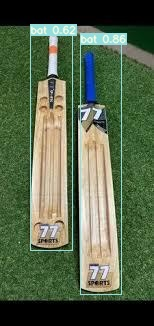

In [55]:
Image(filename='out_out/bat12.jpg', width=300)

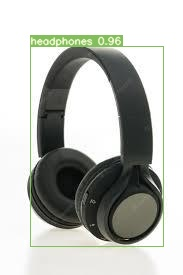

In [63]:
Image(filename='out_out/headphones12.jpg', width=300)

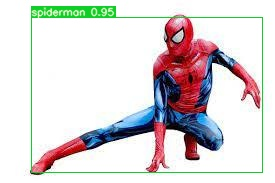

In [65]:
Image(filename='out_out/spiderman2.jpg', width=300)

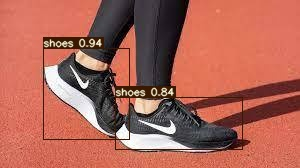

In [87]:
Image(filename='out_out/shoes20.jpg', width=300)

# Display images as a Collage

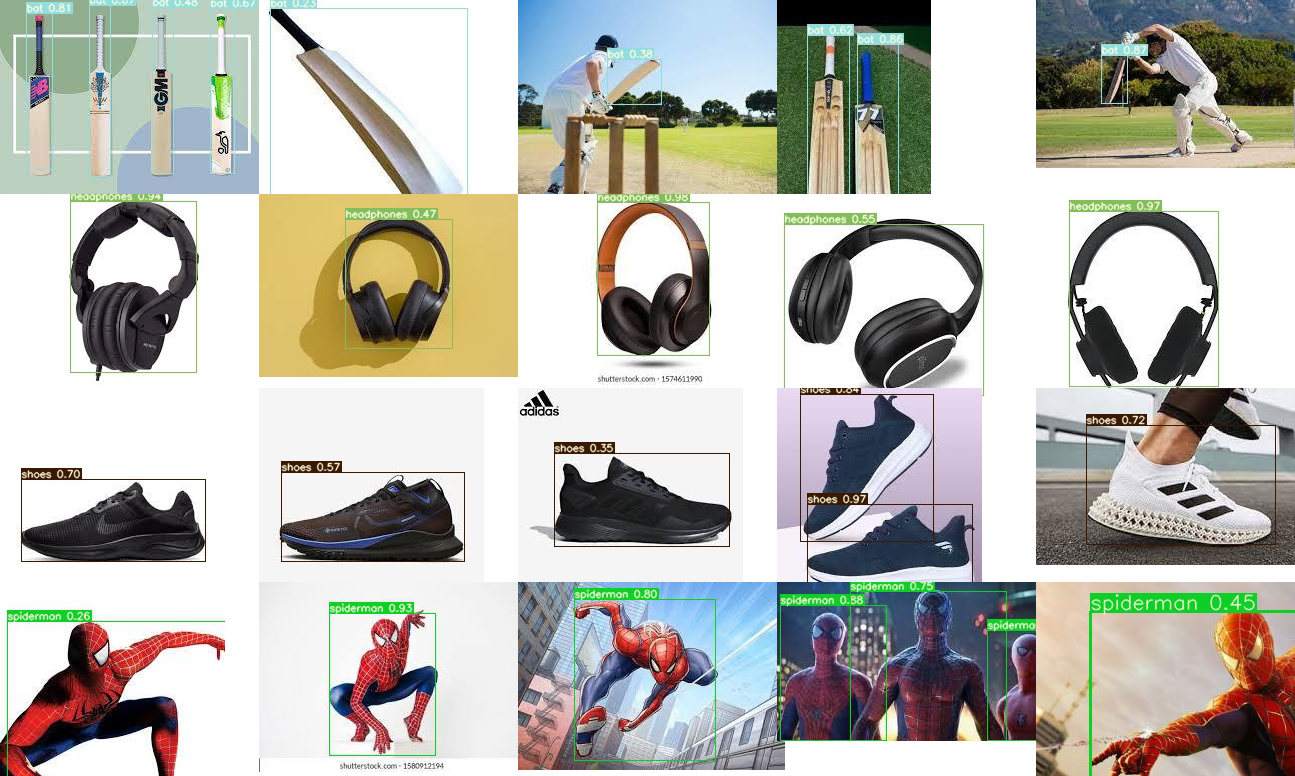

In [114]:
from IPython.display import display
from PIL import Image

# Specify the filenames for each object
bat =         ['bat9.jpg', 'bat7.jpg', 'bat10.jpg', 'bat12.jpg', 'bat19.jpg']
headphones =  ['headphones2.jpg', 'headphones6.jpg', 'headphones10.jpg', 'headphones14.jpg', 'headphones17.jpg']
shoes =       ['shoes3.jpg', 'shoes7.jpg', 'shoes11.jpg', 'shoes15.jpg', 'shoes19.jpg']
spiderman =   ['spiderman5.jpg', 'spiderman6.jpg', 'spiderman10.jpg', 'spiderman16.jpg', 'spiderman20.jpg']

# Combine the image files for all objects
image_files = bat + headphones + shoes + spiderman

# Create a list to hold the image objects
images = []

# Loop through the image files and create Image objects
for filename in image_files:
    img = Image.open('out_out/' + filename)
    images.append(img)

# Display the images in a grid with 5 images per row
num_images = len(images)
num_cols = 5
num_rows = num_images // num_cols + (1 if num_images % num_cols != 0 else 0)
width, height = images[0].size
collage_width = num_cols * width
collage_height = num_rows * height
collage_image = Image.new('RGB', (collage_width, collage_height), (255, 255, 255))

x_offset = 0
y_offset = 0

for i in range(num_images):
    if i < num_cols:
        x_offset = i * width
    else:
        if (i - num_cols) % num_cols == 0:
            x_offset = 0
            y_offset += height
        else:
            x_offset += width
    
    collage_image.paste(images[i], (x_offset, y_offset))
    
display(collage_image)
